Матрица A (с точностью до множителя) 
 [[ 5. -4.  1.  0.  0.  0.  0.]
 [-4.  6. -4.  1.  0.  0.  0.]
 [ 1. -4.  6. -4.  1.  0.  0.]
 [ 0.  1. -4.  6. -4.  1.  0.]
 [ 0.  0.  1. -4.  6. -4.  1.]
 [ 0.  0.  0.  1. -4.  6. -4.]
 [ 0.  0.  0.  0.  1. -4.  5.]]
Матрица собственных векторов
 [[-0.19  0.35 -0.46 -0.5   0.46  0.35  0.19]
 [ 0.35 -0.5   0.35 -0.    0.35  0.5   0.35]
 [-0.46  0.35  0.19  0.5  -0.19  0.35  0.46]
 [ 0.5   0.   -0.5   0.   -0.5  -0.    0.5 ]
 [-0.46 -0.35  0.19 -0.5  -0.19 -0.35  0.46]
 [ 0.35  0.5   0.35 -0.    0.35 -0.5   0.35]
 [-0.19 -0.35 -0.46  0.5   0.46 -0.35  0.19]]
Собственные значения
 [86097.1  67788.21 44471.14 23261.23  8864.39  1995.5    134.78]
Матрица обратная к матрице Т
 [[-0.19  0.35 -0.46  0.5  -0.46  0.35 -0.19]
 [ 0.35 -0.5   0.35  0.   -0.35  0.5  -0.35]
 [-0.46  0.35  0.19 -0.5   0.19  0.35 -0.46]
 [-0.5   0.    0.5   0.   -0.5  -0.    0.5 ]
 [ 0.46  0.35 -0.19 -0.5  -0.19  0.35  0.46]
 [ 0.35  0.5   0.35 -0.   -0.35 -0.5  -0.35]
 [ 0.19  0

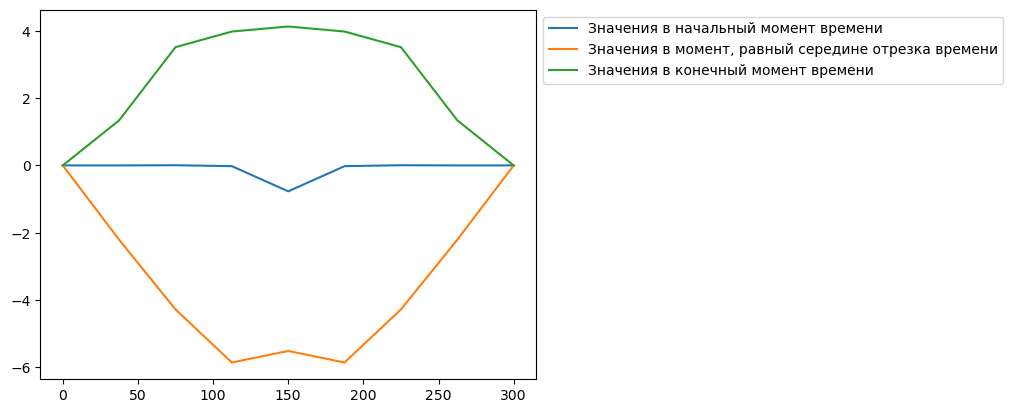

In [67]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

g = 3
s = 12
n = 7
L = 300
P = 300
h = L / (n+1)
alfa = (100+g+s) * 1e8
x = np.arange(0, L+h, h)
a0 = 6 * np.eye(n)
a0[0,0] = 5
a0[n-1,n-1] = 5
a1 = np.ones((n-1, 1))
a2 = np.ones((n-2, 1))
A = a0 - 4*(np.diagflat(a1,-1) + np.diagflat(a1, 1)) + np.diagflat(a2, -2) + np.diagflat(a2, 2)
print('Матрица A (с точностью до множителя) \n', A)

A = alfa*A / h**4
J, T = np.linalg.eig(A)
print('Матрица собственных векторов\n',T)
print('Собственные значения\n', J)
T_inv = np.linalg.inv(T)
print('Матрица обратная к матрице Т\n', T_inv)

fJ = np.zeros((n,n))
for i in range(n):
    fJ[i,i] = J[i]**(1/2) 
sq_A = T@fJ@T_inv
t0 = pi / (4*fJ[0,0])
tmax = 125*t0
kmax = 7
ic = int((n+1) / 2)
tk = [t0, 2*t0, 3*t0, tmax/2, tmax-2*t0, tmax-t0, tmax]
res = np.zeros((kmax, n+2))
for k in range(kmax):
    t = tk[k]
    fJt = np.zeros((n,n))
    for i in range(n):
        fJt[i,i] = np.sin(fJ[i,i]*t)
    Y_t = -P*np.linalg.inv(sq_A)@T@fJt@T_inv
    res[k, 1:n+1] = Y_t[:, ic-1]
print(f'Массив координат точек табуляции по времени\n', tk)
print('Массив значений прогибов в точках табуляции\n', res)

plt.plot(x, res[0], label='Значения в начальный момент времени')
plt.plot(x, res[len(res)//2], label=f'Значения в момент, равный середине отрезка времени')
plt.plot(x, res[-1], label='Значения в конечный момент времени')
plt.legend(bbox_to_anchor=(1,1))